### Etudiant 1: GIANG Phuong-Thu, Cécile (3530406)
### Etudiant 2: LENOIR Romain (3670199)

# TME 3: Descente de gradient

In [1]:
from tme3 import *

## Implémentation des fonctions de coût

On considère dans la suite les conventions suivantes:
   * $X$ une matrice d'exemples de taille $(n, d)$
   * $w$ le vecteur poids de taille $d$
   * $y$ le vecteur des labels pour chaque exemple de $X$, de taille $n$

### Fonction de coût aux moindres carrés

$$ l_j(x) = (y^j - \sum_{i = 1}^{d} w_ix_i^j)^2$$

Son gradient est donc:

$$ \frac{\partial l}{\partial w_j} =  - 2 \sum_{i = 1}^{d} x_i^j (y ^j - \sum_{i = 1}^{d} w_ix_i^j) $$

Ecriture matricielle : $-2X(Y-XW)$

### Fonction de coût pour la régression logistique

$$ l_j(x) = log(1 + exp(−y^j.f_{w_i}(x_i^j))) $$

où $l_w(x) = log( \frac{p(y = 1 | x)}{p(y = -1 | x)} )$, ce qui peut être approximé par une fonction linéaire : $ l_w(x) = w_1 x_1 + w_2 x_2 + ... $. On peut donc écrire:

$$ l_j(x) = log(1 + exp(−y^j \sum_{i = 1}^{d} w_ix_i^j)) $$

Son gradient est donc:

$$ \frac{\partial f}{\partial w_j} = - \frac{y^j \sum_{i = 1}^{d} x_i^j exp(−y \sum_{i = 1}^{d} w_ix_i^j)}{1 + exp(−y \sum_{i = 1}^{d} w_ix_i^j)} $$

Ecriture matricielle: $ - \frac{YX}{1 + exp(YXW)} $

**Test des fonctions de coût pour `w`, `datax` et `datay` aléatoires:**

In [2]:
# Génération des données
datax, datay = gen_arti(epsilon=0.1)
w = np.array([rd.randint(0,20) for i in range(datax.shape[1])])

# Dimensions
n, d = datax.shape
print('\nn =', n)
print('d =', d)

# MSE
print('\nCoût mse de dimensions:', mse(w, datax, datay).shape )
print('Gradient mse de dimensions:', mse_grad(w, datax, datay).shape )

# REGLOG
print('\nCoût reglog de dimensions:', reglog(w, datax, datay).shape )
print('Gradient reglog de dimensions:', reglog_grad(w, datax, datay).shape )


n = 1000
d = 2

Coût mse de dimensions: (1000, 1)
Gradient mse de dimensions: (1000, 2)

Coût reglog de dimensions: (1000, 1)
Gradient reglog de dimensions: (1000, 2)


**Résultats et observations:**

Afin de tester l'exactitude de nos fonctions de gradient, nous utilisons le développement limité de Taylor d'ordre 1. Nous rappelons que ce développement s'écrit:

$$ f(x) = f(x_1) +  \nabla f(x) (x - x_1) + O(||x - x_1||^2)$$

Puisque nous souhaitons vérifier l'exactitude de nos gradients pour des exemples $x$ de dimension 1 et que notre inconnue est le vecteur de poids $w$, nous pouvons réécrire, en posant un $\epsilon$ assez petit:

$$ \nabla f(x + \epsilon) = \frac{f(x + \epsilon) - f(x)}{\epsilon}$$

Cela revient à comparer la valeur du gradient calculée par notre fonction avec celle obtenue par développement limité de Taylor. Avec nos fonctions:

```py
f_grad(w,x,y) = ( f_loss(w + eps, x, y) - f_loss(w, x, y) ) / eps
```


Notre fonction `grad_check` retourne deux valeurs:

   * la différence moyenne entre notre gradient et celui calculé par Taylor sur l'ensemble des points $x$
   * le `DataFrame` permettant la visualisation des valeurs de gradient
  
Nous choisirons de tirer nos valeurs de labels dans $\{-1,1\}$ afin de pouvoir à la fois appliquer les coûts aux moindres carrés et les coûts pour la régression logistique.

**Test d'exactitude du gradient pour `mse`:**

In [3]:
diff_mean, df = grad_check(mse, mse_grad, eps=0.05)

# Affichage
print('\nLa différence moyenne entre le gradient mse et celui de Taylor est de : ', diff_mean[0][0])
display(df)


La différence moyenne entre le gradient mse et celui de Taylor est de :  148.70999999918953


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
mse,65040.0,6496.1,91100.1,13140.9,180800.0,16.1,56649.6,31844.4,27452.1,4601.6,...,139990.4,8716.4,163162.5,7940.1,68.4,27452.1,139990.4,118592.1,136824.9,6496.1
Taylor,64860.0,6478.1,90848.1,13104.5,180300.0,16.1,56492.8,31756.2,27376.1,4588.8,...,139603.2,8692.2,162711.3,7918.1,68.2,27376.1,139603.2,118264.1,136446.5,6478.1


Nos valeurs sont très proches de celles obtenues par développement de Taylor.

**Test d'exactitude du gradient pour `reglog`:**

In [7]:
diff_mean, df = grad_check(reglog, reglog_grad, eps=0.05)

# Affichage
print('\nLa différence moyenne entre le gradient reglog et celui de Taylor est de : ', diff_mean[0][0])
display(df)


La différence moyenne entre le gradient reglog et celui de Taylor est de :  3.9621930324509337e-05


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
reglog,56.0,11.0,74.0,33.0,62.0,57.0,55.0,10.0,46.0,24.0,...,86.0,90.0,68.0,9.0,33.0,2.0,28.0,0.0,40.0,36.0
Taylor,56.0,11.0,74.0,33.0,62.0,57.0,55.0,10.0,46.0,24.0,...,86.0,90.0,68.0,9.0,33.0,2.0,28.0,0.0,40.0,36.0


Si les valeurs de gradient obtenues avec `mse` étaient déjà très satisfaisantes, celles obtenues avec `reglog` le sont encore plus: l'erreur est très proche de 0.

## Descente de gradient

Nous implémentons maintenant une fonction `descente_gradient(datax, datay, f_loss, f_grad, eps=0.01, maxIter=1000, descent='mini-batch', mb = 10)` qui réalise une descent de gradient pour optimiser le coût `f_loss` (dont le gradient est donné par `f_grad`) sur les données `datax` et les labels `datay`, avec un pas de descente de `eps` et `maxIter` itérations.

Le paramètre `descent` peut valoir `'batch'` (valeur par défaut), `'stochastique'` ou `'mini-batch'` et précise la variante de l'algorithme que nous souhaitons utiliser. Dans le cas où `descent = 'mini-batch'`, le paramètre `mb` précise le nombre d'exemples tirés pour corriger $w$.

Notre fonction renvoie trois valeurs:
   * `w` : le paramètre optimal w trouvé
   * `allw` : la liste des w trouvés à chaque itération
   * `allf` : la liste des valeurs de la fonction de coût au fur et à mesure des itérations

Nous utiliserons les mêmes données `datax` et `datay` que générées plus haut.


Première valeur de w:  [0.0, 0.0]

Valeur optimal w* :  [[0.47241448 0.47510881]]


Coût de départ: 1.0

Coût optimum: 0.05190592702950168 




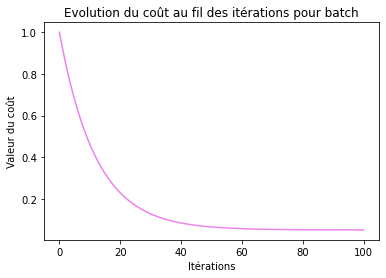

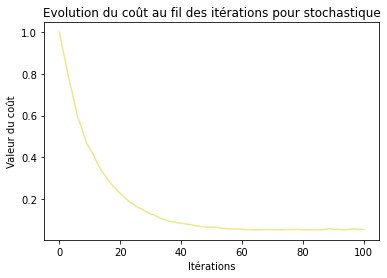

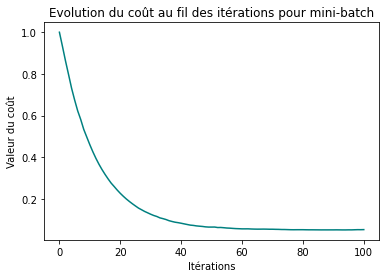

In [3]:
# Descente de gradient batch
w, allw, allf = descente_gradient(datax, datay, mse, mse_grad, eps=0.01, maxIter=100, descent='batch', mb = 5)

# Affichage de w
print('\nPremière valeur de w: ', allw[0])
print('\nValeur optimal w* : ', w)

# Affichage de la 1ère et de la dernière valeur du coût
print('\n\nCoût de départ:', allf[0])
print('\nCoût optimum:', allf[-1], '\n\n')

# Plot de la fonction coût au fil des itérations: descente de gradient batch
plt.figure()
plt.title('Evolution du coût au fil des itérations pour batch')
plt.xlabel('Itérations')
plt.ylabel('Valeur du coût')
plt.plot(allf, label = 'batch', color = 'violet')

# Descente de gradient stochastique
w, allw, allf = descente_gradient(datax, datay, mse, mse_grad, eps=0.01, maxIter=100, descent='stochastique', mb = 5)
plt.figure()
plt.title('Evolution du coût au fil des itérations pour stochastique')
plt.xlabel('Itérations')
plt.ylabel('Valeur du coût')
plt.plot(allf, label = 'stochastique', color = 'khaki')

# Descente de gradient mini-batch
plt.figure()
plt.title('Evolution du coût au fil des itérations pour mini-batch')
plt.xlabel('Itérations')
plt.ylabel('Valeur du coût')
w, allw, allf = descente_gradient(datax, datay, mse, mse_grad, eps=0.01, maxIter=100, descent='mini-batch', mb = 5)
plt.plot(allf, label = 'mini-batch', color = 'teal')

### Classe `RegLineaire` pour la régression linéaire

Nous créons une classe `RegLineaire` qui permet de prédire la valeur du coefficient $a$ pour un ensemble de points suivant la distribution linéaire $ax + \epsilon$, où $\epsilon$ correspond à un bruit uniforme.

* `fit`: phase d'entraînement. Applique la descente de gradient afin d'approximer le paramètre $w$ qui minimise le coût aux moindres carrés (`mse`). $w$ correspond au coefficient directeur $a$ que l'on recherche.

* `predict`: phase de test. Pour des données de test `xtest` et `ytest` données, la méthode prédit les classes de `xtest`.

* `display`: affichage des données d'entraînement (points d'abscisse dans `xtrain` et d'ordonnée dans `ytrain`) et de la droite prédite: $wx$.


Coefficient directeur réel: 97.28
Coefficient linéaire prédit: 96.97865070646789


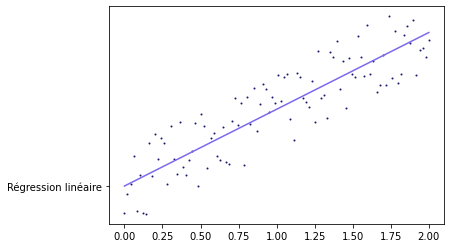

In [4]:
# On décide arbitrairement d'un coefficient directeur a
a = 97.28
print('\nCoefficient directeur réel:', a)

# Génération des données d'entraînement
xtrain = np.array( [ x for x in np.linspace(0, 2.0, 100) ] ).reshape(-1,1)
ytrain = np.array( [ a * x + rd.uniform(-50,50) for x in np.linspace(0,2.0,100) ] )

# Création de notre modèle de régression linéaire
rl = RegLineaire(xtrain, ytrain)

# Phase d'entraînement puis prédiction des classes des données de xtest
rl.fit()
rl.predict(xtrain, ytrain)
w = rl.getw()
print('Coefficient linéaire prédit:', w[0][0])

# Affichage des données et de la droite prédite
rl.display()

Le coefficient directeur prédit (`w`) est très proche du coefficient directeur réel (`a = 97.28`) !

Dans la suite nous ne considérerons que deux classes: $1$ et $-1$.
Notre modèle de régression linéaire, qui peut renvoyer une infinité de valeurs ($f_w(x) = \sum_{i = 1}^{d} w_i x_i$ pour un exemple $x$), n'est alors pas tout à fait adapté.

Nous choisissons donc de transformer notre modèle en un classifieur binaire en imposant un seuil $s = 0$ tel que:
   * si f_x(w) < 0 : on prédit $-1$
   * si f_x(w) > 0 : on prédit $1$

### Classe `RegLogistique` pour la régression logistique

Nous créons une classe `RegLogistique` qui permet de prédire la classe $y ∈ \{-1,1\}$ d'échantillons $x$, après avoir entraîné le modèle sur les données de `xtrain` et `ytrain`.

* `fit`: phase d'entraînement. Applique la descente de gradient afin d'approximer le paramètre $w$ qui minimise le coût logistique (`reglog`).

* `predict`: phase de test. Applique aux données de test `xtrain` la fonction $f_w(x)$, qui fait le produit scalaire entre $w$ et chaque $x$ de `xtrain`. Le seuil de prédiction est $0$:
                * si f_w(x) < 0: le modèle prédit la classe -1
                * si f_w(x) > 0: le modèle prédit la classe 1

* `score`: calcule les scores de prédiction sur les données d'entraînement et les données de test.

In [7]:
# Génération des données d'entraînement et de test
xtrain, ytrain = gen_arti(epsilon=0.1, nbex=10000)
xtest, ytest = gen_arti(epsilon=0.1, nbex=10000)

# Création de notre modèle de régression logistique
rl = RegLogistique( xtrain, ytrain )

# Phase d'entraînement puis prédiction des classes des données de xtest
rl.fit()
ypred = rl.predict( xtest, ytest )
print('\nClasses réelles de xtest: \n', ytest)
print('\nClasses prédites: ', ypred)

# Affichage du score (taux de bonne classification) en entraînement et en test
score_train, score_test = rl.score()
print('\n\nTaux de bonne classification sur les données train: ', score_train)
print('Taux de bonne classification sur les données test: ', score_test)


Classes réelles de xtest: 
 [[ 1.]
 [-1.]
 [ 1.]
 ...
 [ 1.]
 [-1.]
 [-1.]]

Classes prédites:  [ 1. -1.  1. ...  1. -1. -1.]


Taux de bonne classification sur les données train:  1.0
Taux de bonne classification sur les données test:  1.0


## Expérimentations

### Visualisation des résultats

Nous définissons une fonction `main` qui prend en argument des données d'apprentissage (`xtrain` et `ytrain`) et des données de test (`xtest` et `ytest`), leur applique un modèle (`m = 'lineaire'` pour la régression linéaire, `m = 'logistique'` pour la régression logistique) afin d'estimer le paramètre $w$ qui minimise le coût.

On précisera également en argument les attributs permettant de paramétrer la descente de gradient:
   * `descent`: précise si l'on procède par `batch`, `stochastique` ou `mini-batch` (`batch` par défaut)
   * `eps`: le pas du gradient (`0.01` par défaut)
   * `maxIter`: le nombre d'itérations (`1000` par défaut)

La fonction `main` qui affiche:
   * la frontière de décision sur les données d'apprentissage
   * la frontière de décision sur les données de test
   * La fonction du coût en 2D ainsi que l'évolution de `w` au fil des itérations
   * L'évolution du coût au cours du temps

### 1. Pour des données suivant 2 gaussiennes (`data_type = 0`)

**Création de deux modèles `RegLineaire` et `RegLogistique` et visualisation des résultats**

In [2]:
# Génération des données (1000 exemples suivant 2 gaussiennes)
xtrain, ytrain = gen_arti(epsilon=0.1, nbex=1000)
xtest, ytest = gen_arti(epsilon=0.1, nbex=1000)

# Création et apprentissage du modèle de régression linéaire
rl_lineaire = RegLineaire( xtrain, ytrain )
rl_lineaire.fit(descent = 'batch')

# Création et apprentissage du modèle de régression logistique
rl_logistique = RegLogistique( xtrain, ytrain )
rl_logistique.fit(descent = 'batch')

# Affichage des paramètres w* optimaux pour chaque modèle
print('\nPour RegLineaire: w* = ', rl_lineaire.getw() )
print('\nPour RegLogistique: w* = ', rl_logistique.getw() )


Pour RegLineaire: w* =  [[0.4694741 ]
 [0.47347285]]

Pour RegLogistique: w* =  [[1.44528227]
 [1.43338168]]


**Visualisation des résultats pour la <span class="bg-info text-success">régression linéaire</span>, pour un pas `eps` dans `[0.00001, 0.001, 0.1, 0.5]`**

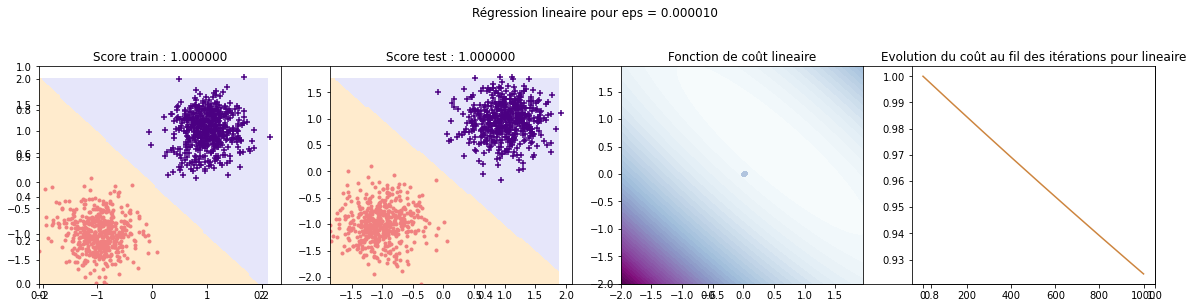

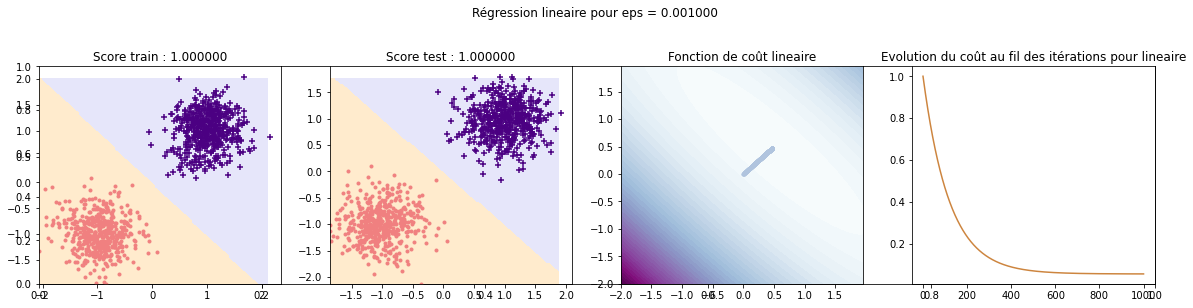

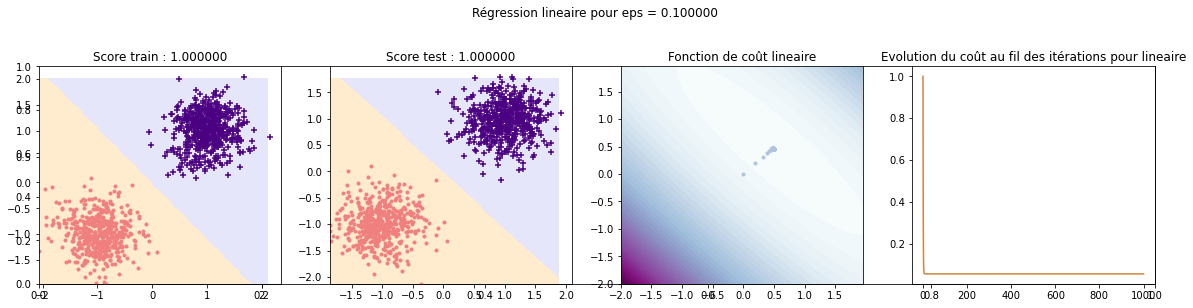

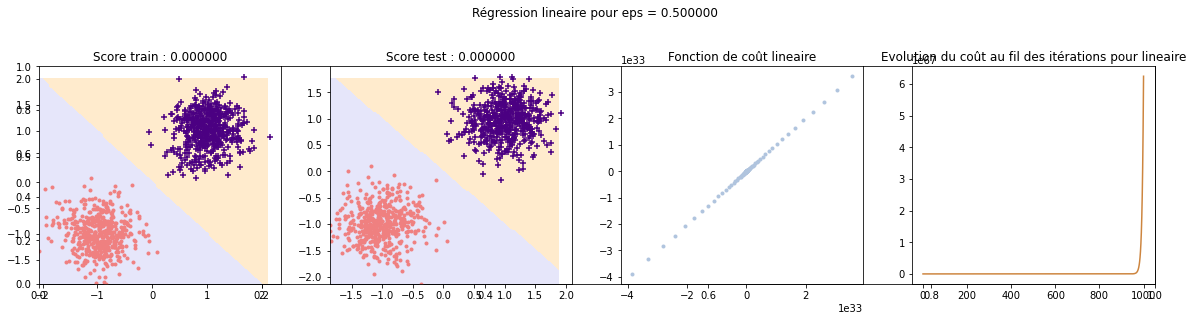

In [5]:
# On définit les valeurs de eps
epsilon = [0.00001, 0.001, 0.1, 0.5]

for eps in epsilon:
    main( xtrain, ytrain, xtest, ytest, m = 'lineaire', eps=eps, maxIter=1000, descent='batch' )

**Observations:**

Pour toutes nos valeurs de `eps`, les données d'entraînement (premières sous-figures) et de test (deuxièmes sous-figures) sont toujours bien séparées.

Nous nous intéressons surtout aux deux dernières sous-figures:

- **<span class="bg-warning text-warning">Figure 1</span>**: pour `eps = 0.00001`, nous voyons que le pas de gradient est bien trop petit pour que `w` puisse atteindre sa valeur optimale en $1000$ itérations: on voudrait qu'il arrive au centre des ellipses. Le coût baisse très peu au cours du temps, puisqu'il passe de 1 à 0.93 en 1000 itérations. On est en **sous-apprentissage**.

- **<span class="bg-warning text-warning">Figure 2</span>**: pour `eps = 0.001` le pas de gradient est suffisant pour que `w` atteigne sa valeur optimale en $1000$ itérations. Le coût passe de 1 à 0 en un peu plus de 400 itérations.

- **<span class="bg-warning text-warning">Figure 3</span>**: pour `eps = 0.1`, on observe la même chose, mais `w` converge bien plus vite vers sa valeur optimale. Le coût est nul en moins de 10 itérations !

- **<span class="bg-warning text-warning">Figure 4</span>**: pour `eps = 0.5`, on observe cette fois-ci le phénomène inverse de la figure $1$: le pas de gradient est maintenant trop grand et `w` finit par diverger. Le coût explose !

**Visualisation des résultats pour la <span class="bg-info text-success">régression logistique</span>, pour un pas `eps` dans `[0.00001, 0.001, 0.1]`**

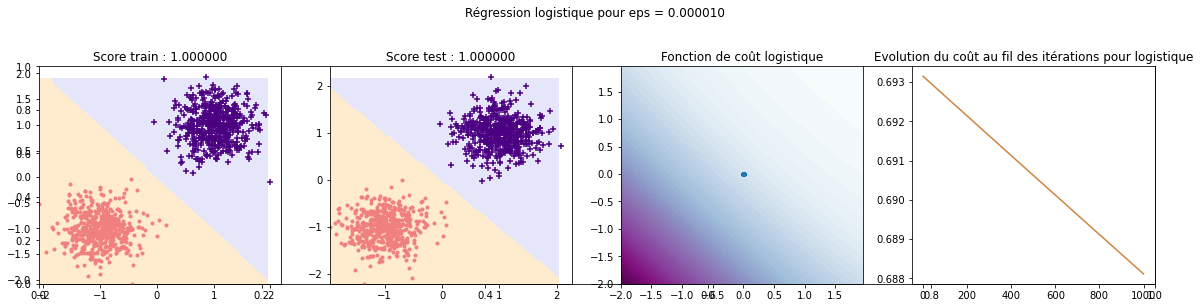

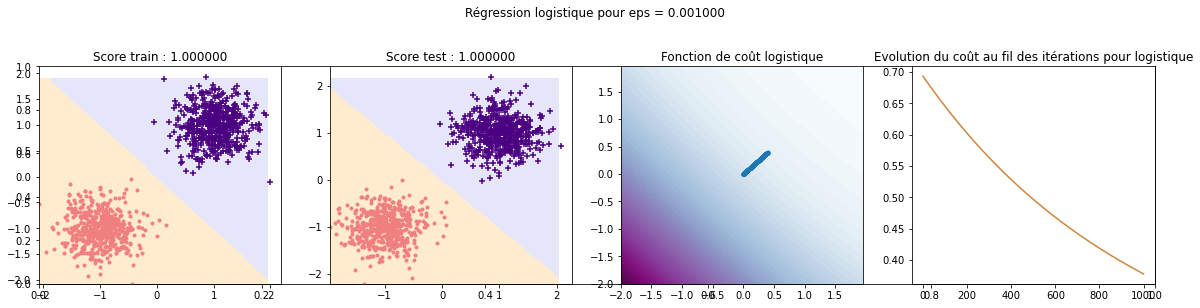

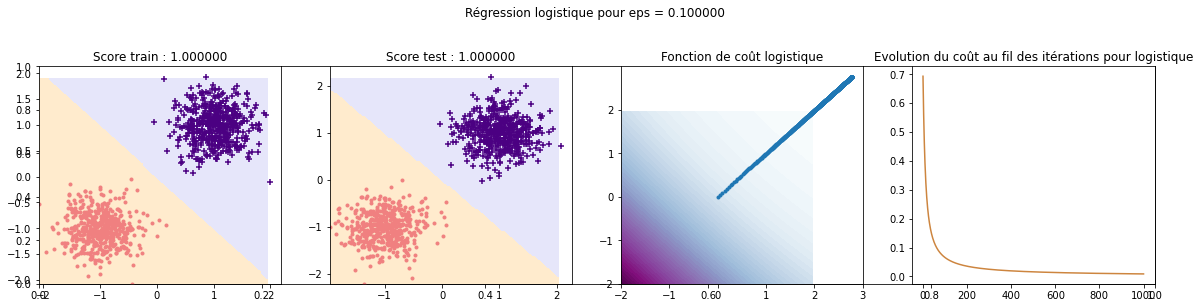

In [7]:
# On définit les valeurs de eps
epsilon = [0.00001, 0.001, 0.1]

for eps in epsilon:
    main( xtrain, ytrain, xtest, ytest, m = 'logistique', eps=eps, maxIter=1000, descent='batch' )

Avec la régression logistique, `w` converge moins vite que pour la régression linéaire vers sa valeur optimale au fur et à mesure que `eps` augmente: la fonction de coût converge plus lentement vers un coût nul.

### 2. Pour des données suivant 4 gaussiennes (`data_type = 1`)

**Création de deux modèles `RegLineaire` et `RegLogistique` et visualisation des résultats**

In [9]:
# Génération des données (1000 exemples suivant 4 gaussiennes)
xtrain, ytrain = gen_arti(epsilon=0.1, nbex=1000, data_type=1)
xtest, ytest = gen_arti(epsilon=0.1, nbex=1000, data_type=1)

# Création et apprentissage du modèle de régression linéaire
rl_lineaire = RegLineaire( xtrain, ytrain )
rl_lineaire.fit(descent = 'batch')

# Création et apprentissage du modèle de régression logistique
rl_logistique = RegLogistique( xtrain, ytrain )
rl_logistique.fit(descent = 'batch')

**Visualisation des résultats pour la <span class="bg-info text-success">régression linéaire</span>, pour un pas `eps` dans `[0.00001, 0.001, 0.1, 0.9]`**

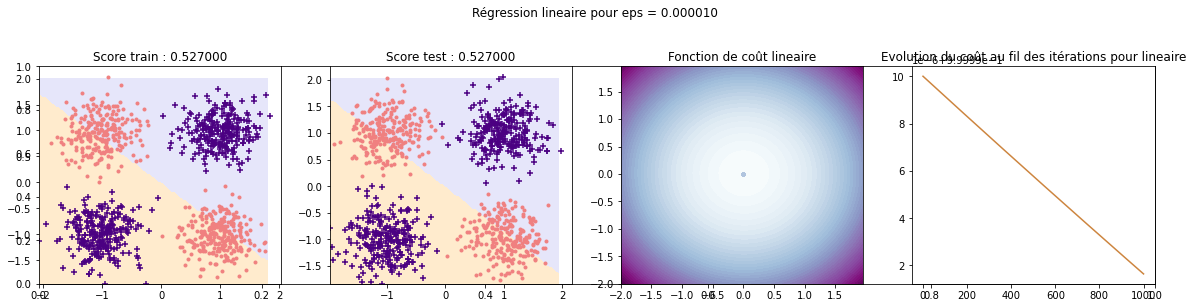

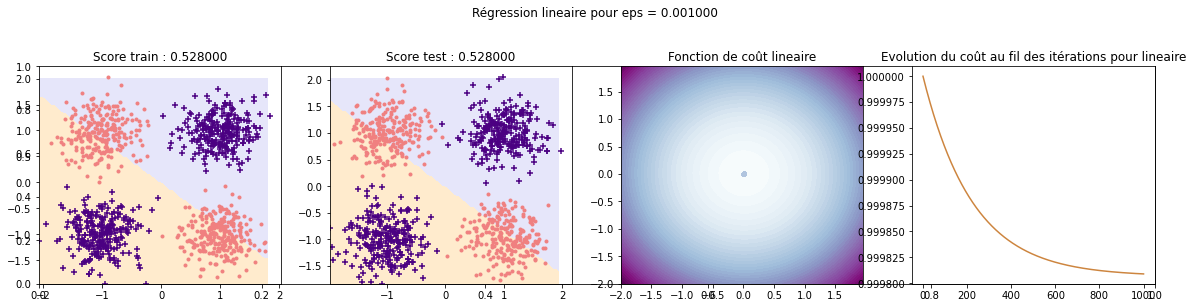

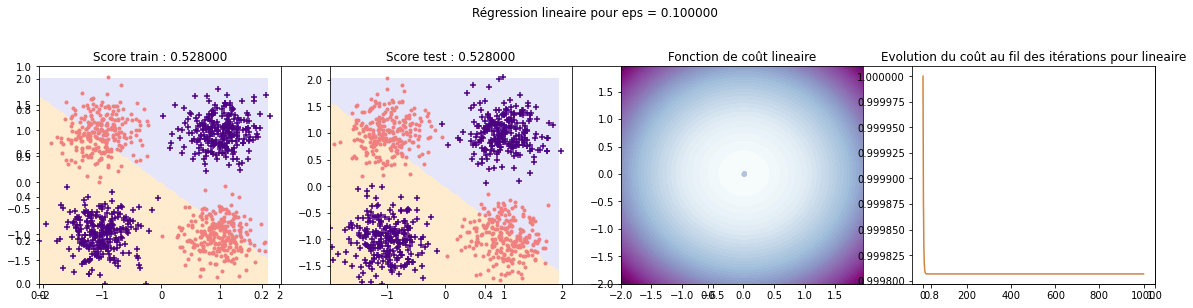

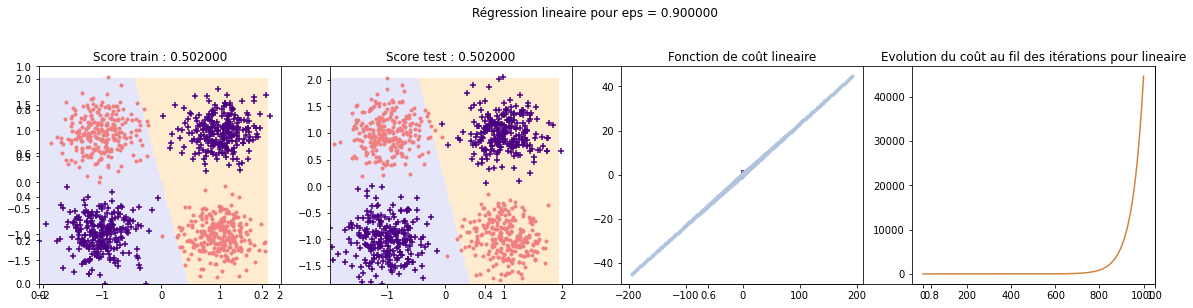

In [11]:
# On définit les valeurs de eps
epsilon = [0.00001, 0.001, 0.1, 0.9]

for eps in epsilon:
    main( xtrain, ytrain, xtest, ytest, m = 'lineaire', eps=eps, maxIter=1000, descent='batch' )

**Observations:**

Nous nous trouvons maintenant dans un cas à 4 gaussiennes et 2 classes. Nous voyons d'après les figures qu'il n'est pas possible de trouver une frontière séparant les 2 classes (frontière linéaire). Nous remarquons qu'à `w` optimal, la frontière sépare nos exemples en 2 ensembles contenant chacune la même quantité d'échantillons de classe $-1$, et la même quantité d'échantillons de classe $1$ (score à 0.5).

Nous nous intéressons maintenant aux deux dernières sous-figures:

- **<span class="bg-warning text-warning">Figure 1</span>**: pour `eps = 0.00001`, `w` atteint presque sa valeur optimale, son coût à la $1000$e itération vaut 2.

- **<span class="bg-warning text-warning">Figure 2</span>**: pour `eps = 0.001` `w` atteint sa valeur optimale en $1000$ itérations. Le coût vaut alors 0.

- **<span class="bg-warning text-warning">Figure 3</span>**: pour `eps = 0.1`, on observe la même chose, mais `w` converge bien plus vite vers sa valeur optimale. Le coût est nul en moins de 10 itérations !

- **<span class="bg-warning text-warning">Figure 4</span>**: pour `eps = 0.9`, divergence de `w`. Le coût explose !

**Visualisation des résultats pour la <span class="bg-info text-success">régression logistique</span>, pour un pas `eps` dans `[0.00001, 0.001, 0.9, 8]`**

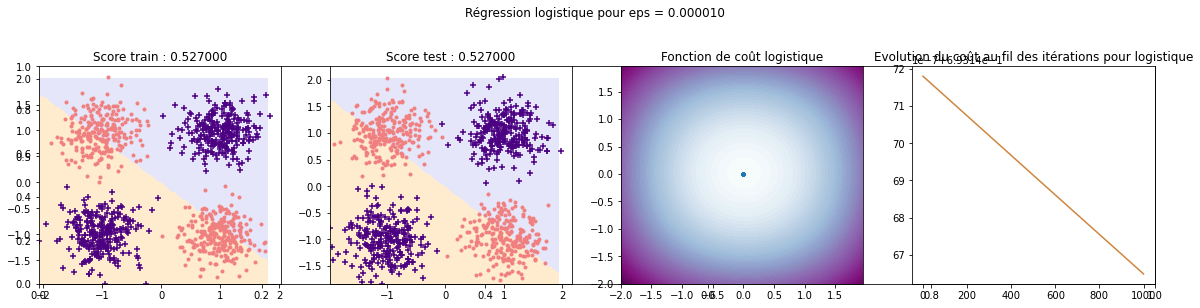

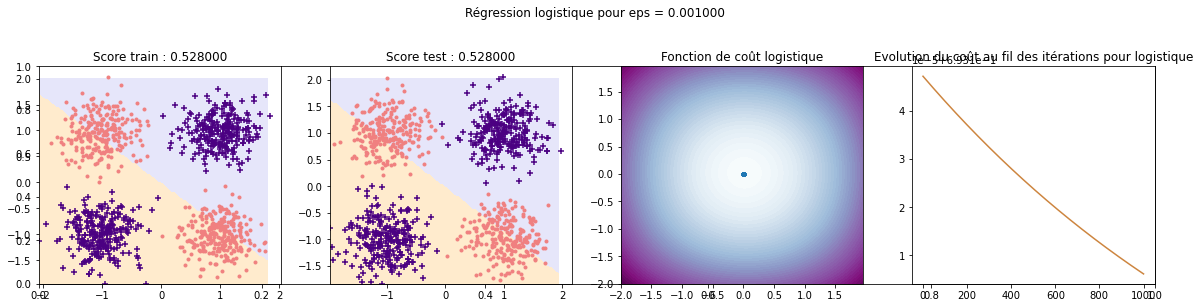

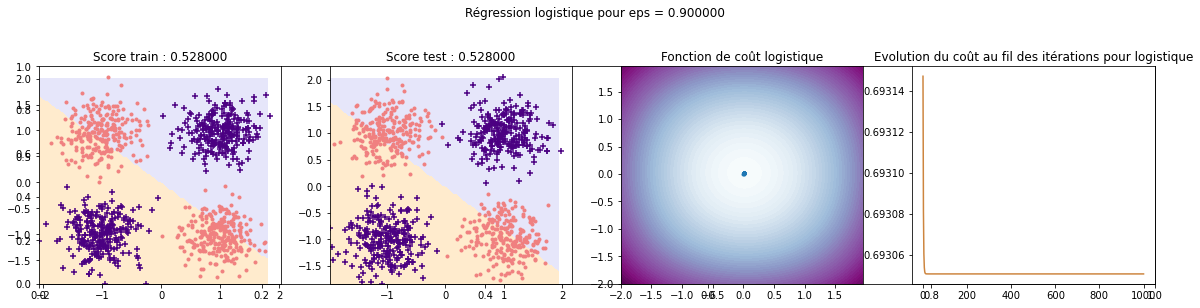

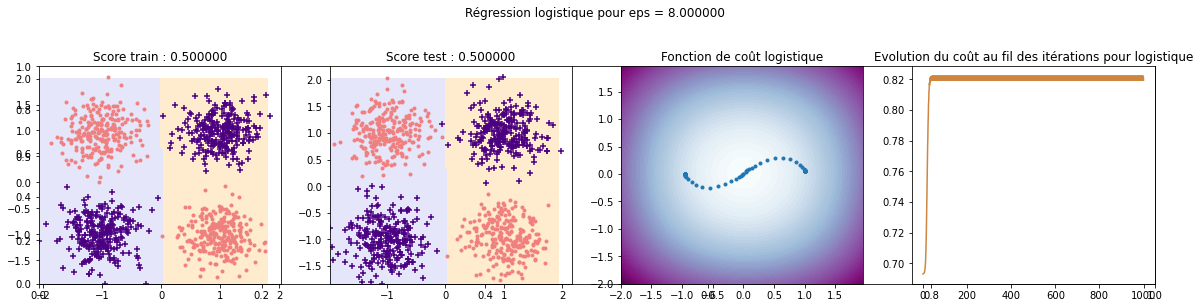

In [19]:
# On définit les valeurs de eps
epsilon = [0.00001, 0.001, 0.9, 8]

for eps in epsilon:
    main( xtrain, ytrain, xtest, ytest, m = 'logistique', eps=eps, maxIter=1000, descent='batch' )

Comme pour le cas à 2 gaussiennes, la fonction de coût converge beaucoup moins vite vers 0. Alors que pour `eps = 0.9`, elle divergeait dans le cas linéaire, dans le cas logistique on est dans un cas optimum où `w` converge très vite vers sa valeur optimale.

La divergence se fait à partie de `eps = 8`, qui est un pas énorme !

### 3. Pour des données suivant un échiquier (`data_type = 2`)

**Création de deux modèles `RegLineaire` et `RegLogistique` et visualisation des résultats**

In [20]:
# Génération des données (1000 exemples suivant un échiquier)
xtrain, ytrain = gen_arti(epsilon=0.1, nbex=1000, data_type=2)
xtest, ytest = gen_arti(epsilon=0.1, nbex=1000, data_type=2)

# Création et apprentissage du modèle de régression linéaire
rl_lineaire = RegLineaire( xtrain, ytrain )
rl_lineaire.fit(descent = 'batch')

# Création et apprentissage du modèle de régression logistique
rl_logistique = RegLogistique( xtrain, ytrain )
rl_logistique.fit(descent = 'batch')

**Visualisation des résultats pour la <span class="bg-info text-success">régression linéaire</span>, pour un pas `eps` dans `[0.00001, 0.001, 0.1, 0.2]`**

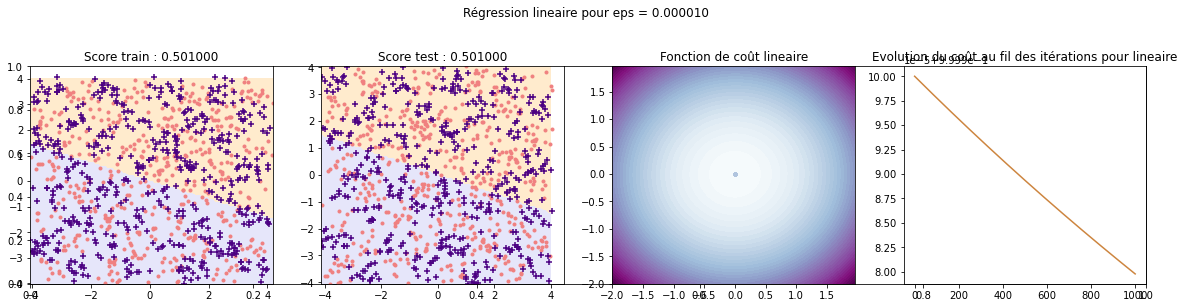

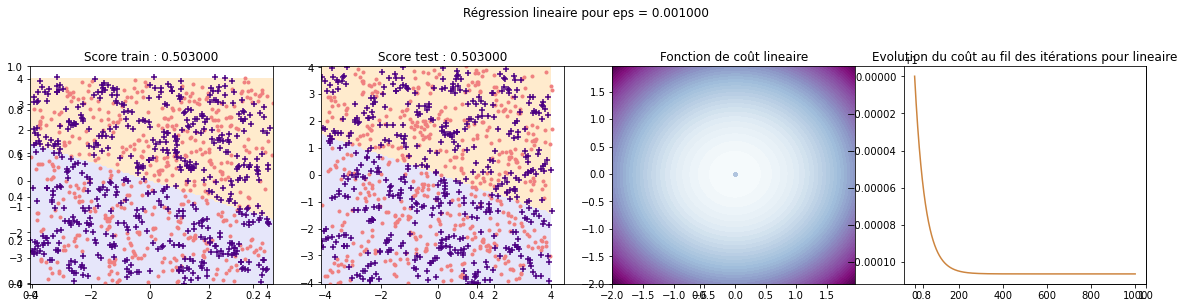

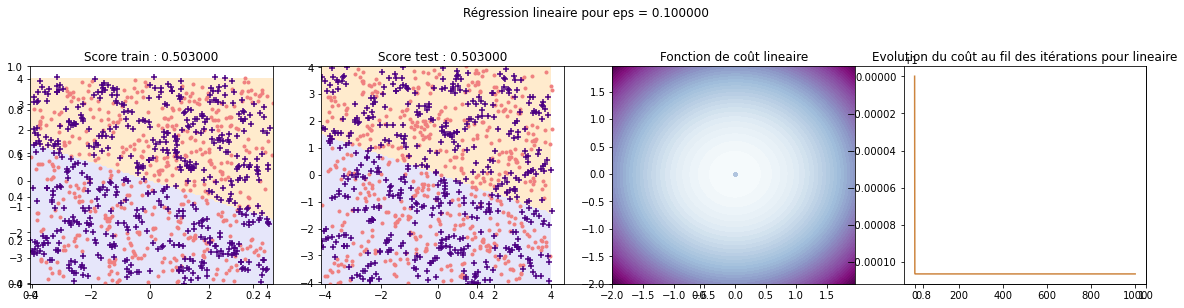

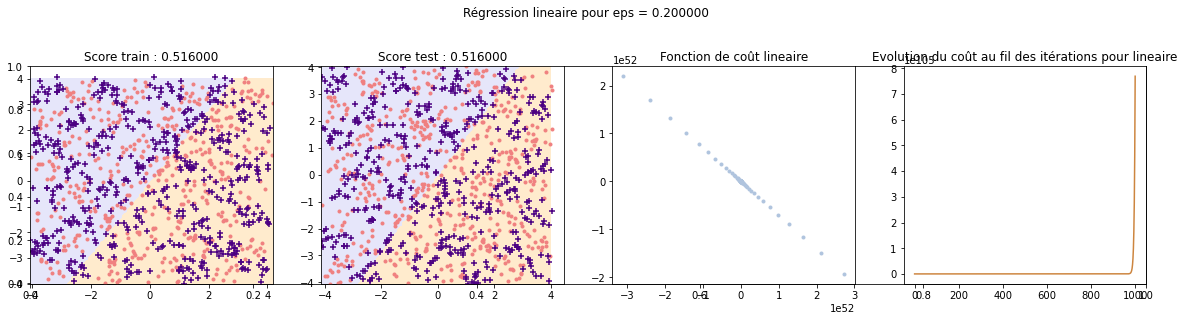

In [30]:
# On définit les valeurs de eps
epsilon = [0.00001, 0.001, 0.1, 0.2]

for eps in epsilon:
    main( xtrain, ytrain, xtest, ytest, m = 'lineaire', eps=eps, maxIter=1000, descent='batch' )

Nous nous trouvons maintenant dans un cas où les exemples sont tirées selon un échiquier, nous gardons toujours 2 classes.

Nous voyons d'après les figures qu'il n'est pas possible de trouver une frontière séparant les 2 classes (frontière linéaire). Nous remarquons qu'à `w` optimal, la frontière sépare nos exemples en 2 ensembles contenant chacune la même quantité d'échantillons de classe $-1$, et la même quantité d'échantillons de classe $1$ (score à 0.5).

La divergence pour le modèle de régression linéaire arrive très vite: pour `eps = 0.2` !

**Visualisation des résultats pour la <span class="bg-info text-success">régression logistique</span>, pour un pas `eps` dans `[0.00001, 0.001, 0.1, 1.5]`**

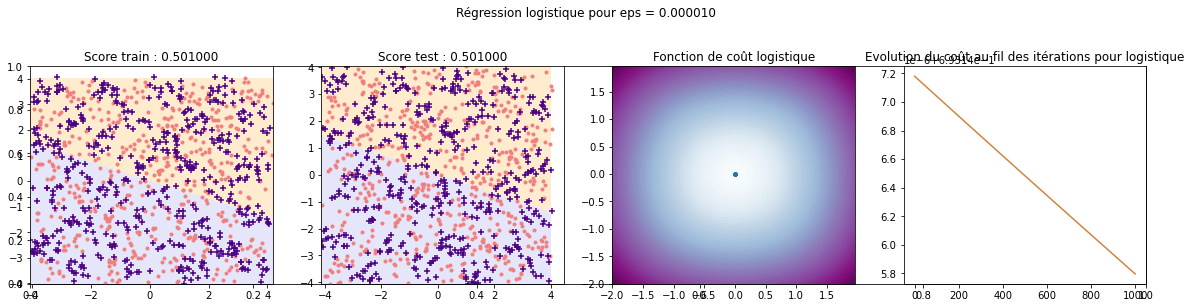

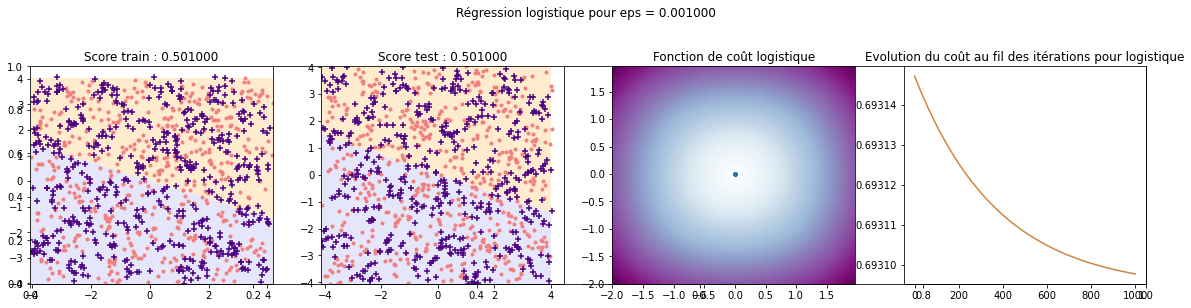

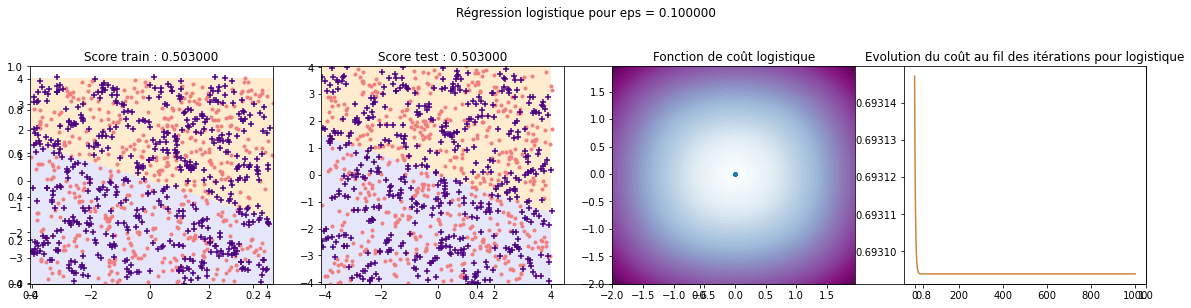

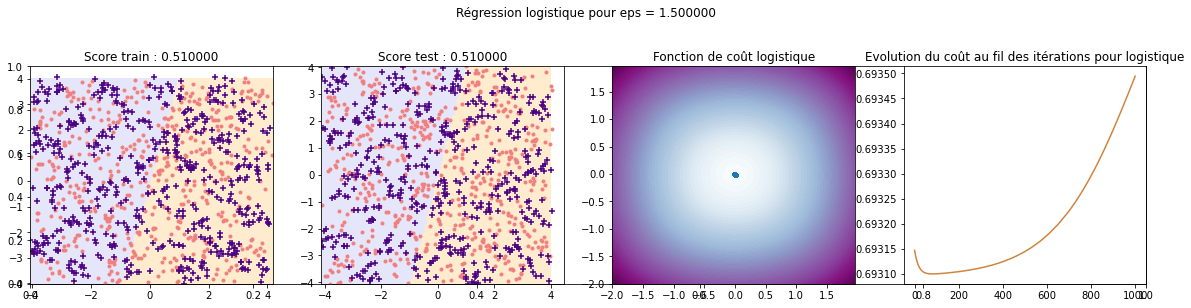

In [38]:
# On définit les valeurs de eps
epsilon = [0.00001, 0.001, 0.1, 1.5]

for eps in epsilon:
    main( xtrain, ytrain, xtest, ytest, m = 'logistique', eps=eps, maxIter=1000, descent='batch' )

La divergence arrive très vite pour le modèle de régression logistique aussi: dès `eps = 1.5` (contre `eps = 8` pour 4 gaussiennes).

### 4. Pour des données suivant 2 gaussiennes (`data_type = 0`) avec un bruit élevé

Nous avons vu tout à l'heure que les modèles de régression linéaire et logistique donnent d'excellents résultats dans le cas de données linéairement séparables. Ajoutons maintenant un grand bruit en tirant nos données pour rendre le problème non-séparable.

**Création de deux modèles `RegLineaire` et `RegLogistique` et visualisation des résultats**

In [41]:
# Génération des données (1000 exemples suivant 2 gaussiennes)
xtrain, ytrain = gen_arti(epsilon=1, nbex=1000)
xtest, ytest = gen_arti(epsilon=1, nbex=1000)

# Création et apprentissage du modèle de régression linéaire
rl_lineaire = RegLineaire( xtrain, ytrain )
rl_lineaire.fit(descent = 'batch')

# Création et apprentissage du modèle de régression logistique
rl_logistique = RegLogistique( xtrain, ytrain )
rl_logistique.fit(descent = 'batch')

# Affichage des paramètres w* optimaux pour chaque modèle
print('\nPour RegLineaire: w* = ', rl_lineaire.getw() )
print('\nPour RegLogistique: w* = ', rl_logistique.getw() )


Pour RegLineaire: w* =  [[0.32894231]
 [0.32723293]]

Pour RegLogistique: w* =  [[1.21093218]
 [1.16709538]]


**Visualisation des résultats pour la <span class="bg-info text-success">régression linéaire</span>, pour un pas `eps = 0.01`**

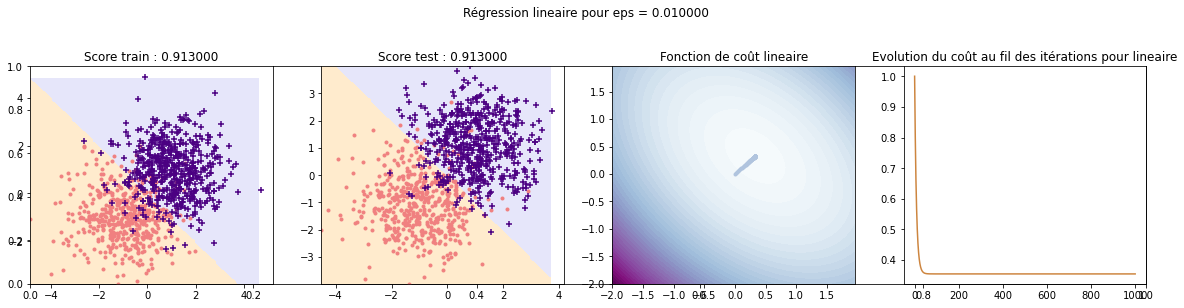

In [43]:
# On définit un pas eps = 0.01
main( xtrain, ytrain, xtest, ytest, m = 'lineaire', eps=0.01, maxIter=1000, descent='batch' )

**Visualisation des résultats pour la <span class="bg-info text-success">régression logistique</span>, pour un pas `eps = 0.01`**

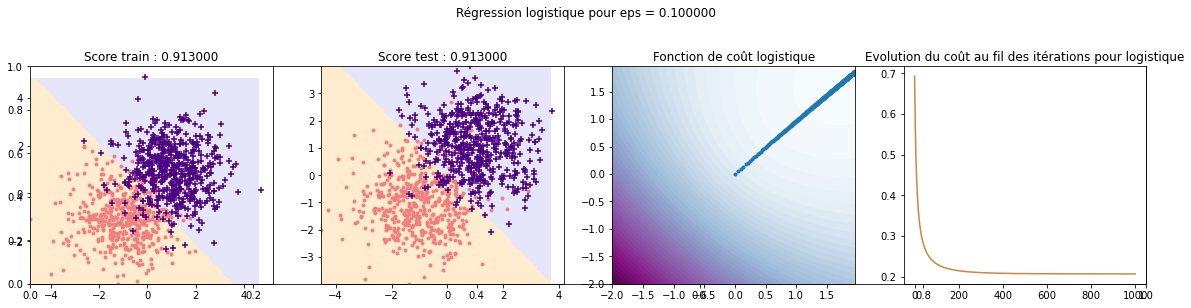

In [45]:
# On définit un pas eps = 0.1
main( xtrain, ytrain, xtest, ytest, m = 'logistique', eps=0.1, maxIter=1000, descent='batch' )

Nous remarquons que pour les deux modèles, `w` converge bien pour des valeurs de `eps` correctes mais le coût ne sera jamais nul: il convergera vers une valeur strictement supérieure à 0 puisque les données ne sont pas linéairement séparables.

**Conclusion:**

Les modèles de régression linéaire et logistique ne sont adaptés qu'aux problèmes de classification binaire linéairement séparables !